<a href="https://colab.research.google.com/github/pra11chit/practical_deep_learning/blob/master/mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.7MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 1.0MB 7.1MB/s 
     |████████████████████████████████| 194kB 15.9MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 40kB 4.6MB/s 
     |████████████████████████████████| 92kB 5.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 2.6MB 9.9MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [ ]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,  62, 239, 252],
       [  0,   0,   0, 162, 252, 252],
       [  0,   0,   0,  40, 217, 252],
       [  0,   0,   0,   0,  38,  99],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,  62, 239, 252],
        [  0,   0,   0, 162, 252, 252],
        [  0,   0,   0,  40, 217, 252],
        [  0,   0,   0,   0,  38,  99],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[:, :])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,75,105,245,253,253,255,129,37,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,62,239,252,252,252,252,253,252,223,138,7,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,162,252,252,252,252,252,253,252,252,252,126,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,40,217,252,139,132,132,133,160,252,252,212,35,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,38,99,2,0,0,0,7,173,252,252,205,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,157,252,222,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,252,222,0,0,0,0,0,0,0,0,0


In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

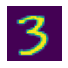

In [ ]:
show_image(three_tensors[1])

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [ ]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
stacked_threes.ndim

3

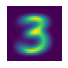

In [ ]:
mean3 = stacked_threes.mean(0) #dimension along 6131
show_image(mean3);

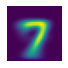

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

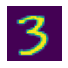

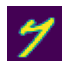

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3)
a_7 = stacked_sevens[1]
show_image(a_7)

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_7 - mean7).abs().mean()
dist_7_sqr = ((a_7 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1304), tensor(0.2585))

In [ ]:
#Let's create tensors of validation set
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
#function to calculate mean absolute distance between two images
